In [2]:
import numpy as np
import random as rn
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
plt.style.use(['dark_background'])

def ising2d(grid,B,animate,plot):
    m = []
    E = []

    for i in range(nmax):
        for j in range(n0):
            #Finds random site, Why random
            a = np.random.randint(0,N) 
            b = np.random.randint(0,N)
            s = grid[a,b]
            #Flips the randomly picked site 
            snew = -s
            spinsum = grid[(a+1)%N,b] + grid[a,(b+1)%N] + grid[(a-1)%N,b] + grid[a,(b-1)%N]
            old = - J*s * spinsum
            new = -J*snew * spinsum
            dE = new-old
            if dE<=0 or np.random.random() < np.exp(-B*dE):
                # If met, accept change
                grid[a,b]=snew
        m.append(np.sum(grid)/(N*N))
        neigh = np.roll(grid,1)+np.roll(grid,-1)+np.roll(grid,-1,axis=0)+np.roll(grid,1,axis=0)
        E.append(np.sum(-J*grid*neigh-h*grid)/(N*N))
    if plot == 1:
    
        plt.plot(range(nmax),E,'b')
        plt.plot(range(nmax),m,'r')
    if animate == 1:
        return grid
    else:
        return grid, m, E



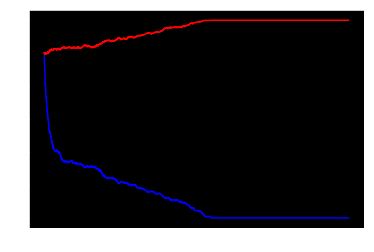

In [18]:
N = 20
J = 1
T = 0.001
B = 1/T
h = 1
nmax = 5000
n0 = 10
grid = np.random.choice([-1,1],N*N).reshape(N,N)
#%matplotlib notebook
d = ising2d(grid,B,0,1)


In [22]:

# Find critical temp
for T in np.arange(1,8,0.01):
    array,m, E = ising2d(grid,T,0,0)
    if -0.1 < np.mean(m) and np.mean(m) < 0.1:
        print("Temp =" ,T)
        print(np.mean(m))
        plt.plot(np.arange(1,8,0.01),np.mean(m),'r')
print("Done")



Done


Animation af Grid

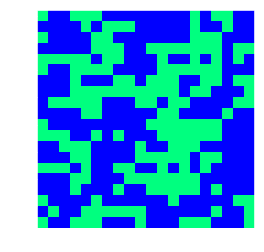

In [52]:
N = 20
J = 1
B = 1/5
h = 1
nmax = 200
n0 = 9
grid = np.random.choice([-1,1],N*N).reshape(N,N)
def animate(i):
    im.set_data(animate.grid)
    animate.grid = ising2d(animate.grid,B,1,0)
animate.grid = grid

fig, ax = plt.subplots()
im = ax.imshow(grid, cmap=plt.cm.winter)
anim = animation.FuncAnimation(fig, animate,interval=200,
                              save_count=200)
HTML(anim.to_html5_video())

Mean energi for hvert run vs temp

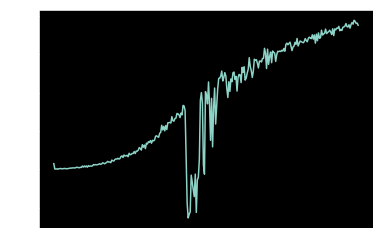

In [3]:
N = 20
J = 1
T = np.arange(1.00,4.00,0.01)
B = 1/T
h = 1
nmax = 3000
n0 = 20
grid = np.random.choice([-1,1],N*N).reshape(N,N)
gnsE = []
for x in B:
    array,m,E = ising2d(grid,x,0,0)
    gnsE.append(np.mean(E))

plt.plot(T,gnsE)

Mean af magnetic moment for hver run

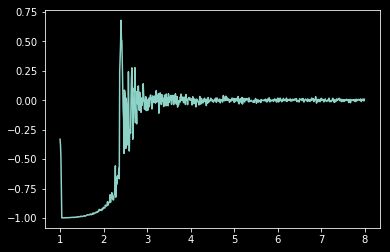

In [15]:
N = 20
J = 1
T = np.arange(1.00,4.00,0.01)
B = 1/T
h = 1
nmax = 3000
n0 = N
grid = np.random.choice([-1,1],N*N).reshape(N,N)
gnsm = []
for x in B:
    array,m,E = ising2d(grid,x,0,0)
    gnsm.append(np.mean(m))

plt.plot(T,gnsm)

Sidste punkt af hver moment for hvert run

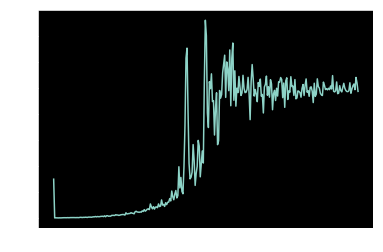

In [23]:
N = 20
J = 1
T = np.arange(1.00,4.00,0.01)
B = 1/T
h = 1
nmax = 3000
n0 = 10
grid = np.random.choice([-1,1],N*N).reshape(N,N)
gnsm = []
for x in B:
    array,m,E = ising2d(grid,x,0,0)
    gnsm.append(np.mean(m))

plt.plot(T,gnsm)